# <ins>MSCA 681 Project-Predictive modeling for airline passenger satisfaction

**<ins>Group D<ins>**: Ibrahim Abdullahi (40326498), Rawan Elshal (40339847), Clothilde Hawat (40339023), Carys Tannoury (40327381)

**Business Objective**: Predict passenger satisfaction and identify key drivers to improve service quality
and customer retention in the airline industry using supervised classification.

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

import xgboost as xgb

# Loading the dataset
Train_df = pd.read_csv('/Users/rawanelshal/Downloads/train.csv')
print(Train_df.head())

   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

### **A. Data prepation and exploration**

In [18]:
# Data Structure 
print('\n1. BASIC DATASET INFO:')
print(f'Dataset shape: {Train_df.shape}')
print(f'Dataset rows: {Train_df.shape[0]}')
print(f'Dataset columns: {Train_df.shape[1]}')

print('\n2. COLUMN INFORMATION:')
print(Train_df.info())

demographic_vars = ['Age', 'Gender', 'Customer Type']
operational_vars = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Type of Travel', 'Class']
service_quality_vars = ['Inflight wifi service', 'Online boarding', 'Seat comfort', 
                       'Inflight entertainment', 'On-board service', 'Food and drink', 
                       'Cleanliness', 'Baggage handling']

numeric_variables = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] + service_quality_vars
categorical_variables = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

print("\nDemographic Variables:", demographic_vars)
print("Operational Variables:", operational_vars)
print("Service Quality Variables:", service_quality_vars)

print('\n3. DATA TYPES:')
print(Train_df.dtypes)

#Missing Values
print('\n4. MISSING VALUES COUNT:')
missing_values = Train_df.isnull().sum() 
print(missing_values)

#Categorical Values
print('\n5. CATEGORICAL VALUES:')
for col in categorical_variables:
    print(f"\nValue counts for {col}:")
    print(Train_df[col].value_counts())  

#Summary Statistics
print('\n6. SUMMARY STATISTICS:')
print(Train_df.describe())


1. BASIC DATASET INFO:
Dataset shape: (103904, 26)
Dataset rows: 103904
Dataset columns: 26

2. COLUMN INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  


7. TARGET VARIABLE ANALYSIS:
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

Percentages:
satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64


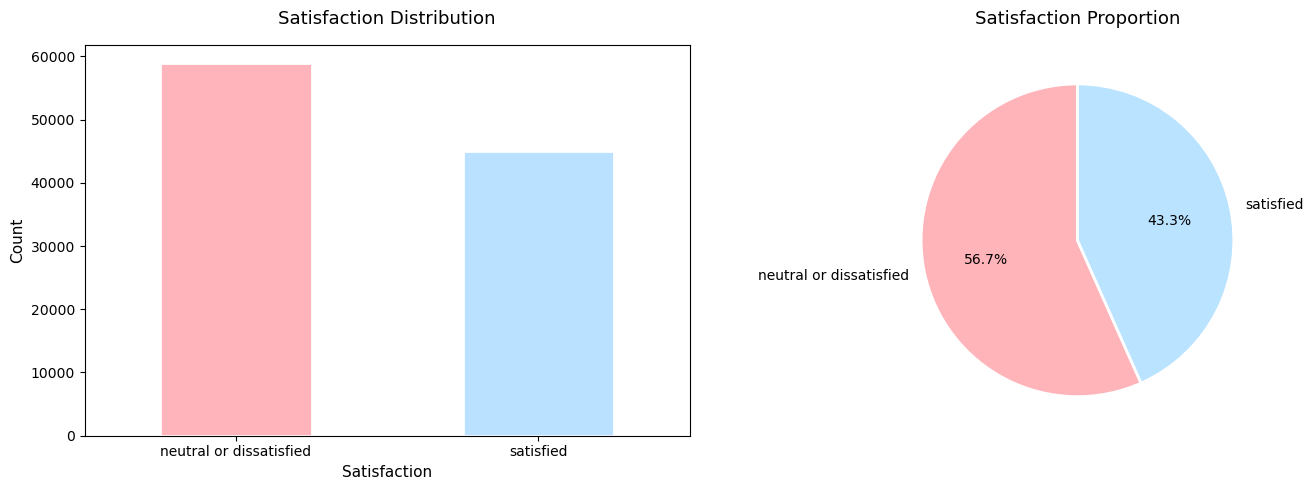

In [8]:
#Target Variable
print('\n7. TARGET VARIABLE ANALYSIS:')
print(Train_df['satisfaction'].value_counts())
print('\nPercentages:')
print(Train_df['satisfaction'].value_counts(normalize=True) * 100)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

Train_df['satisfaction'].value_counts().plot(kind='bar', ax=axes[0], 
                                             color=['#ffb3ba', '#bae1ff'], 
                                             edgecolor='white', linewidth=2)
axes[0].set_title('Satisfaction Distribution', fontsize=13, pad=15)
axes[0].set_xlabel('Satisfaction', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

Train_df['satisfaction'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                             colors=['#ffb4ba', '#bae3ff'],
                                             startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
axes[1].set_title('Satisfaction Proportion', fontsize=13, pad=15)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


8. DEMOGRAPHIC ANALYSIS:


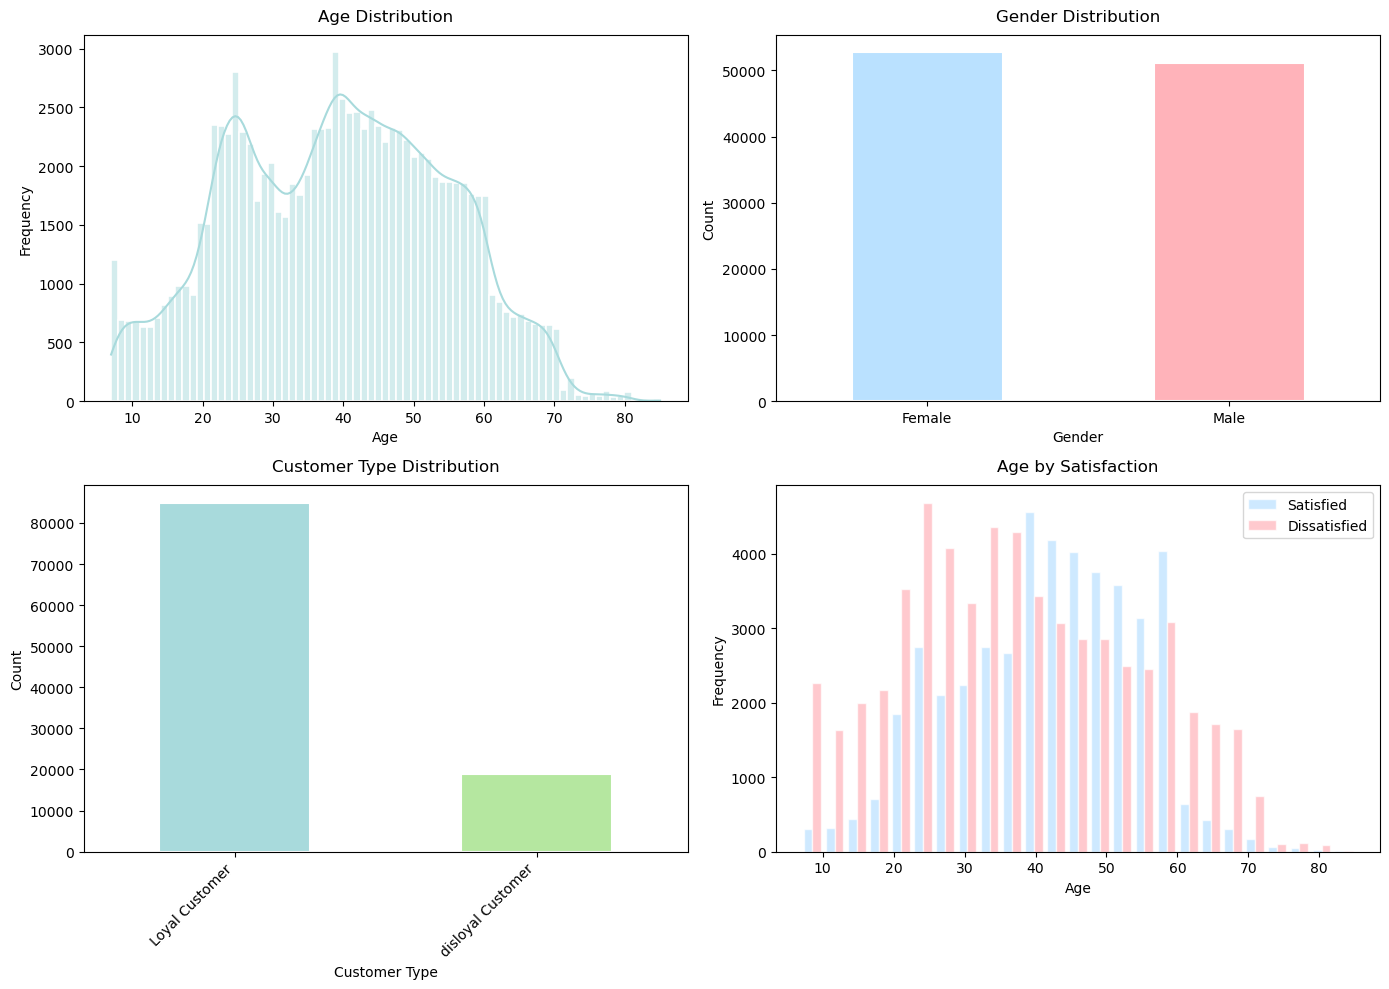

In [9]:
#Demographic Analysis
print('\n8. DEMOGRAPHIC ANALYSIS:')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(data=Train_df, x='Age', kde=True, ax=axes[0, 0], 
            color='#a8dadc', edgecolor='white', linewidth=1.2)
axes[0, 0].set_title('Age Distribution', fontsize=12, pad=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)

Train_df['Gender'].value_counts().plot(kind='bar', ax=axes[0, 1], 
                                       color=['#bae1ff', '#ffb3ba'],
                                       edgecolor='white', linewidth=1.5)
axes[0, 1].set_title('Gender Distribution', fontsize=12, pad=10)
axes[0, 1].set_ylabel('Count', fontsize=10)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

Train_df['Customer Type'].value_counts().plot(kind='bar', ax=axes[1, 0], 
                                              color=['#a8dadc', '#b5e7a0'],
                                              edgecolor='white', linewidth=1.5)
axes[1, 0].set_title('Customer Type Distribution', fontsize=12, pad=10)
axes[1, 0].set_ylabel('Count', fontsize=10)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

satisfied_age = Train_df[Train_df['satisfaction'] == 'satisfied']['Age']
dissatisfied_age = Train_df[Train_df['satisfaction'] == 'neutral or dissatisfied']['Age']
axes[1, 1].hist([satisfied_age, dissatisfied_age], bins=25, 
               label=['Satisfied', 'Dissatisfied'], 
               color=['#bae1ff', '#ffb3ba'], alpha=0.7, edgecolor='white', linewidth=1)
axes[1, 1].set_title('Age by Satisfaction', fontsize=12, pad=10)
axes[1, 1].set_xlabel('Age', fontsize=10)
axes[1, 1].set_ylabel('Frequency', fontsize=10)
axes[1, 1].legend(frameon=True)

plt.tight_layout()
plt.show()


9. OPERATIONAL FACTORS:


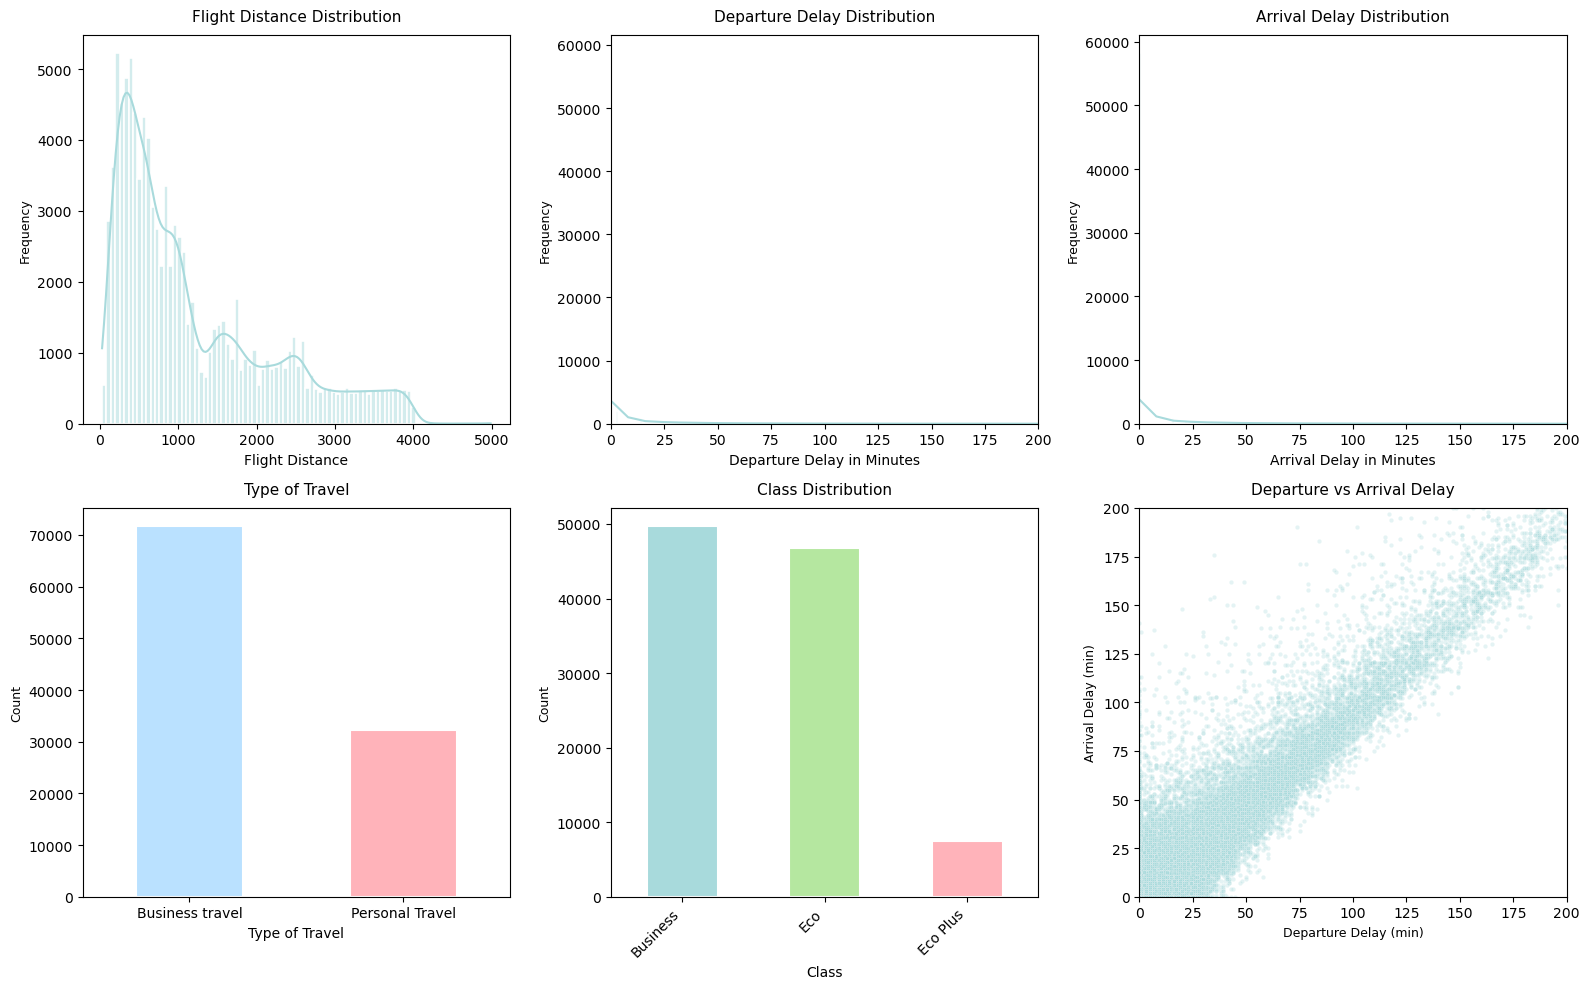

In [10]:
#Operational Factors
print('\n9. OPERATIONAL FACTORS:')

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

sns.histplot(data=Train_df, x='Flight Distance', kde=True, ax=axes[0, 0], 
            color='#a8dadc', edgecolor='white', linewidth=1.2)
axes[0, 0].set_title('Flight Distance Distribution', fontsize=11, pad=10)
axes[0, 0].set_ylabel('Frequency', fontsize=9)

sns.histplot(data=Train_df, x='Departure Delay in Minutes', kde=True, ax=axes[0, 1], 
            color='#a8dadc', edgecolor='white', linewidth=1.2)
axes[0, 1].set_title('Departure Delay Distribution', fontsize=11, pad=10)
axes[0, 1].set_xlim([0, 200])
axes[0, 1].set_ylabel('Frequency', fontsize=9)

sns.histplot(data=Train_df, x='Arrival Delay in Minutes', kde=True, ax=axes[0, 2], 
            color='#a8dadc', edgecolor='white', linewidth=1.2)
axes[0, 2].set_title('Arrival Delay Distribution', fontsize=11, pad=10)
axes[0, 2].set_xlim([0, 200])
axes[0, 2].set_ylabel('Frequency', fontsize=9)

Train_df['Type of Travel'].value_counts().plot(kind='bar', ax=axes[1, 0], 
                                               color=['#bae1ff', '#ffb3ba'],
                                               edgecolor='white', linewidth=1.5)
axes[1, 0].set_title('Type of Travel', fontsize=11, pad=10)
axes[1, 0].set_ylabel('Count', fontsize=9)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

Train_df['Class'].value_counts().plot(kind='bar', ax=axes[1, 1], 
                                     color=['#a8dadc', '#b5e7a0', '#ffb3ba'],
                                     edgecolor='white', linewidth=1.5)
axes[1, 1].set_title('Class Distribution', fontsize=11, pad=10)
axes[1, 1].set_ylabel('Count', fontsize=9)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

axes[1, 2].scatter(Train_df['Departure Delay in Minutes'], 
                  Train_df['Arrival Delay in Minutes'], 
                  alpha=0.3, color='#a8dadc', edgecolors='white', linewidth=0.3, s=10)
axes[1, 2].set_title('Departure vs Arrival Delay', fontsize=11, pad=10)
axes[1, 2].set_xlabel('Departure Delay (min)', fontsize=9)
axes[1, 2].set_ylabel('Arrival Delay (min)', fontsize=9)
axes[1, 2].set_xlim([0, 200])
axes[1, 2].set_ylim([0, 200])

plt.tight_layout()
plt.show()


10. SERVICE QUALITY RATINGS:


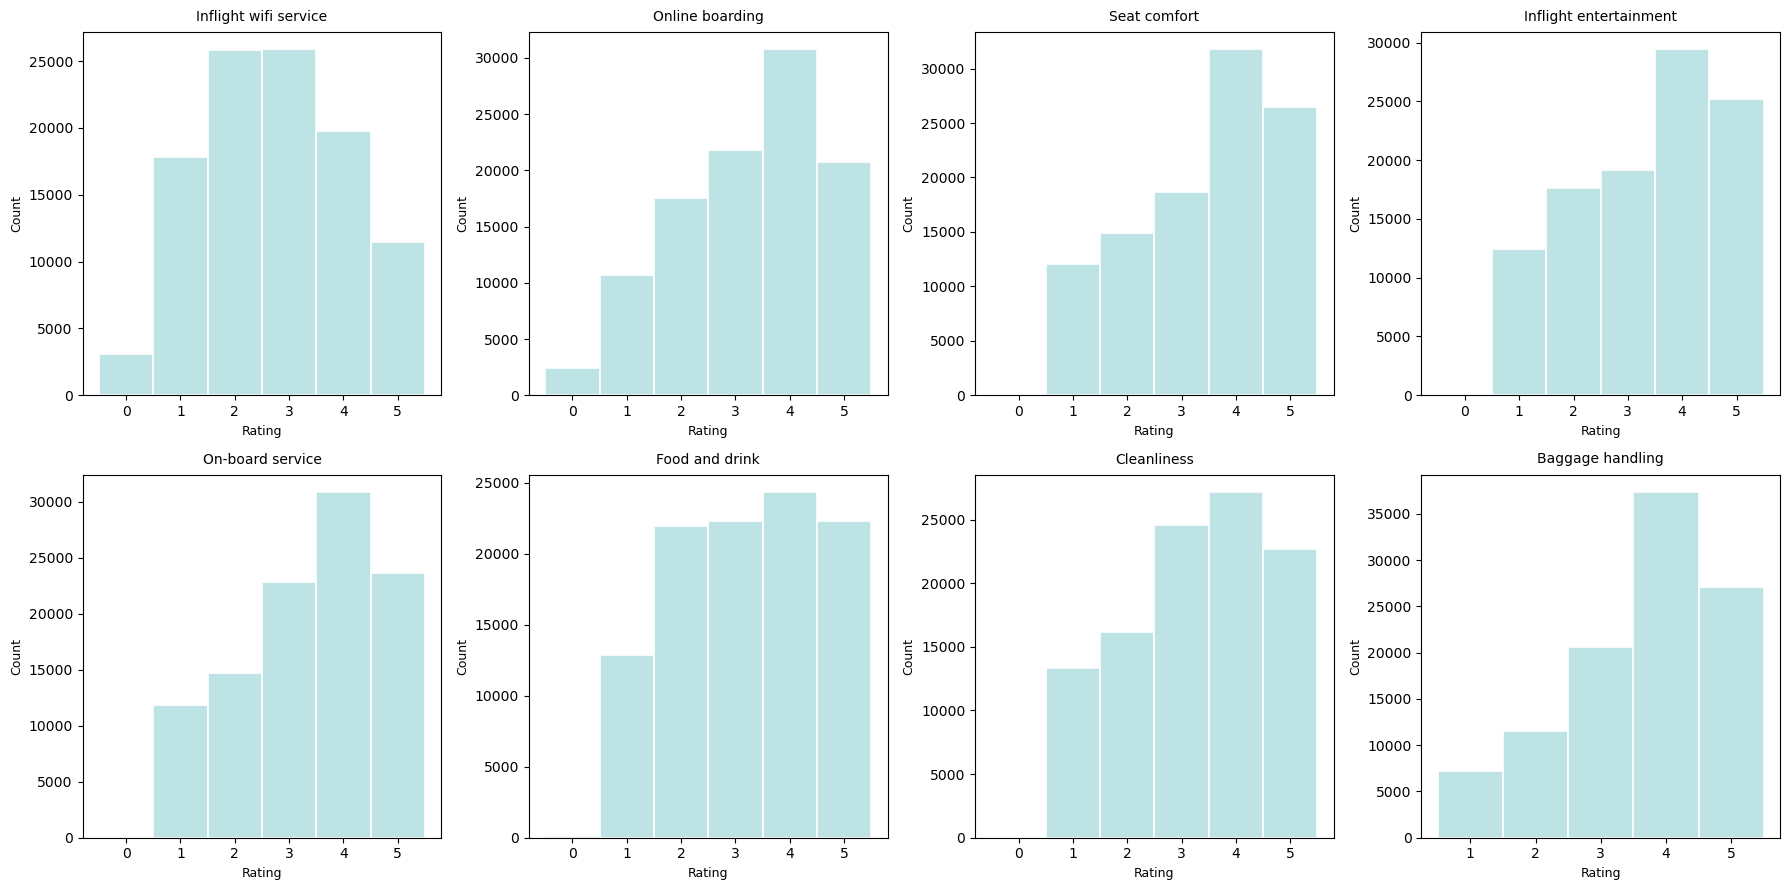

In [11]:
#Service Quality Ratings
print('\n10. SERVICE QUALITY RATINGS:')

fig, axes = plt.subplots(2, 4, figsize=(18, 9))
axes = axes.ravel()

for i, col in enumerate(service_quality_vars):
    sns.histplot(data=Train_df, x=col, kde=False, ax=axes[i], 
                color='#a8dadc', edgecolor='white', linewidth=1.2, discrete=True)
    axes[i].set_title(col, fontsize=10, pad=8)
    axes[i].set_xlabel('Rating', fontsize=9)
    axes[i].set_ylabel('Count', fontsize=9)

plt.tight_layout()
plt.show()


11. DEMOGRAPHICS VS SATISFACTION:

Gender vs Satisfaction:
satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                          30193      22534
Male                            28686      22491

Customer Type vs Satisfaction:
satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                       44390      40533
disloyal Customer                    14489       4492

Type of Travel vs Satisfaction:
satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                    29909      41746
Personal Travel                    28970       3279

Class vs Satisfaction:
satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                        15185      34480
Eco                             38044       8701
Eco Plus                         56

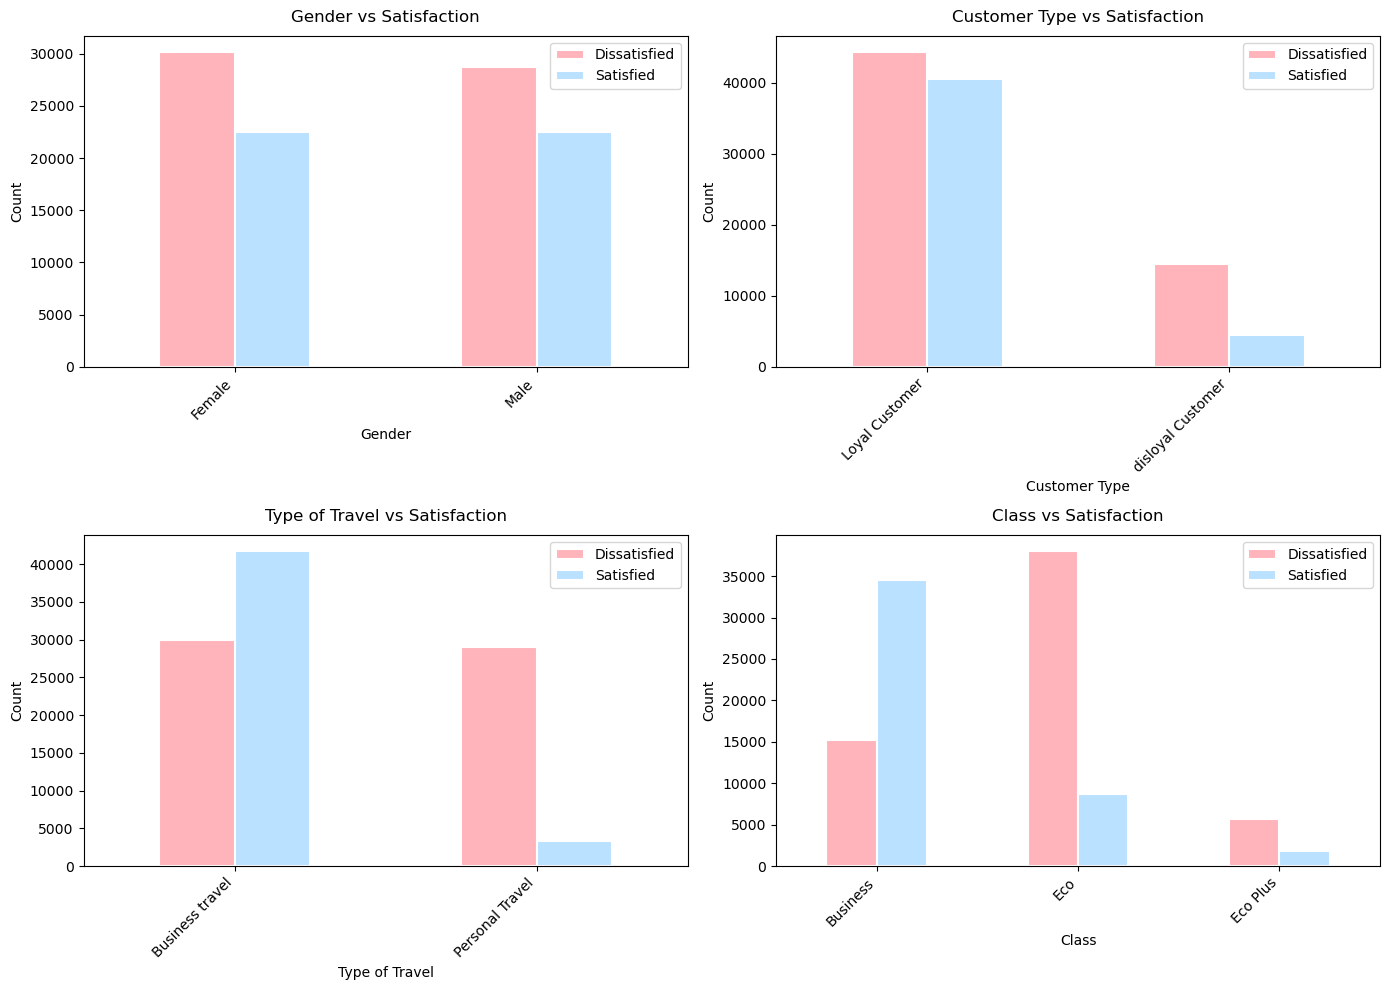

In [12]:
#Demographics vs Satisfaction
print('\n11. DEMOGRAPHICS VS SATISFACTION:')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

demo_cat_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for i, col in enumerate(demo_cat_vars):
    crosstab = pd.crosstab(Train_df[col], Train_df['satisfaction'])
    print(f"\n{col} vs Satisfaction:")
    print(crosstab)
    crosstab.plot(kind='bar', ax=axes[i], color=['#ffb3ba', '#bae1ff'], 
                 edgecolor='white', linewidth=1.5)
    axes[i].set_title(f'{col} vs Satisfaction', fontsize=12, pad=10)
    axes[i].legend(['Dissatisfied', 'Satisfied'], frameon=True)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


12. SERVICE QUALITY VS SATISFACTION:

Mean ratings - Satisfied:
Inflight wifi service     3.161288
Online boarding           4.027474
Seat comfort              3.966530
Inflight entertainment    3.964931
On-board service          3.857324
Food and drink            3.521310
Cleanliness               3.744342
Baggage handling          3.966396
dtype: float64

Mean ratings - Dissatisfied:
Inflight wifi service     2.399633
Online boarding           2.656125
Seat comfort              3.036295
Inflight entertainment    2.894156
On-board service          3.019158
Food and drink            2.958050
Cleanliness               2.936123
Baggage handling          3.375991
dtype: float64


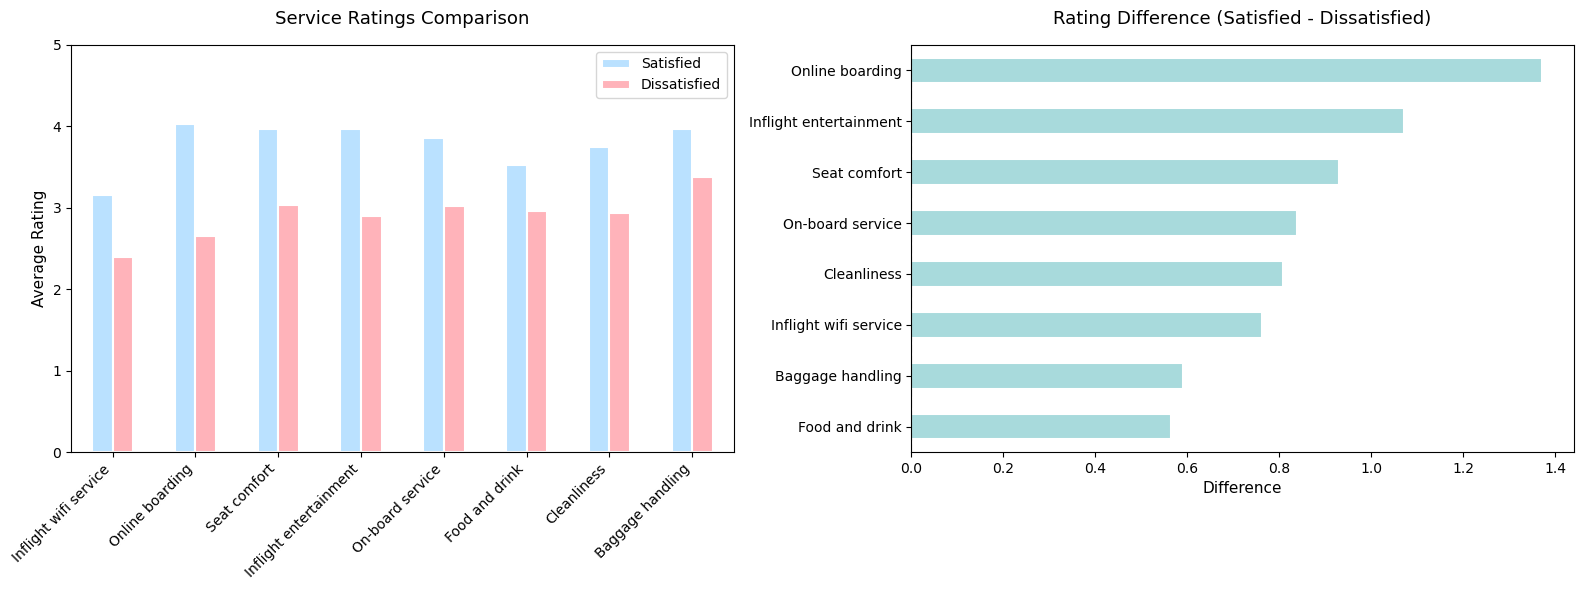

In [13]:
#Service Quality vs Satisfaction
print('\n12. SERVICE QUALITY VS SATISFACTION:')

satisfied_means = Train_df[Train_df['satisfaction'] == 'satisfied'][service_quality_vars].mean()
dissatisfied_means = Train_df[Train_df['satisfaction'] == 'neutral or dissatisfied'][service_quality_vars].mean()

print("\nMean ratings - Satisfied:")
print(satisfied_means)
print("\nMean ratings - Dissatisfied:")
print(dissatisfied_means)

ratings_comparison = pd.DataFrame({
    'Satisfied': satisfied_means,
    'Dissatisfied': dissatisfied_means
})

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ratings_comparison.plot(kind='bar', ax=axes[0], color=['#bae1ff', '#ffb3ba'], 
                       edgecolor='white', linewidth=1.5)
axes[0].set_title('Service Ratings Comparison', fontsize=13, pad=15)
axes[0].set_ylabel('Average Rating', fontsize=11)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].legend(frameon=True, fancybox=True)
axes[0].set_ylim([0, 5])

rating_diff = satisfied_means - dissatisfied_means
rating_diff.sort_values().plot(kind='barh', ax=axes[1], color='#a8dadc', 
                              edgecolor='white', linewidth=1.5)
axes[1].set_title('Rating Difference (Satisfied - Dissatisfied)', fontsize=13, pad=15)
axes[1].set_xlabel('Difference', fontsize=11)
axes[1].axvline(x=0, color='gray', linestyle='--', linewidth=1.5)

plt.tight_layout()
plt.show()


13. CORRELATION ANALYSIS:

Correlation with Satisfaction:
Online boarding               0.503557
Inflight entertainment        0.398059
Seat comfort                  0.349459
On-board service              0.322383
Cleanliness                   0.305198
Flight Distance               0.298780
Inflight wifi service         0.284245
Baggage handling              0.247749
Food and drink                0.209936
Age                           0.137167
Departure Delay in Minutes   -0.050494
Arrival Delay in Minutes     -0.057582
Name: satisfaction_binary, dtype: float64


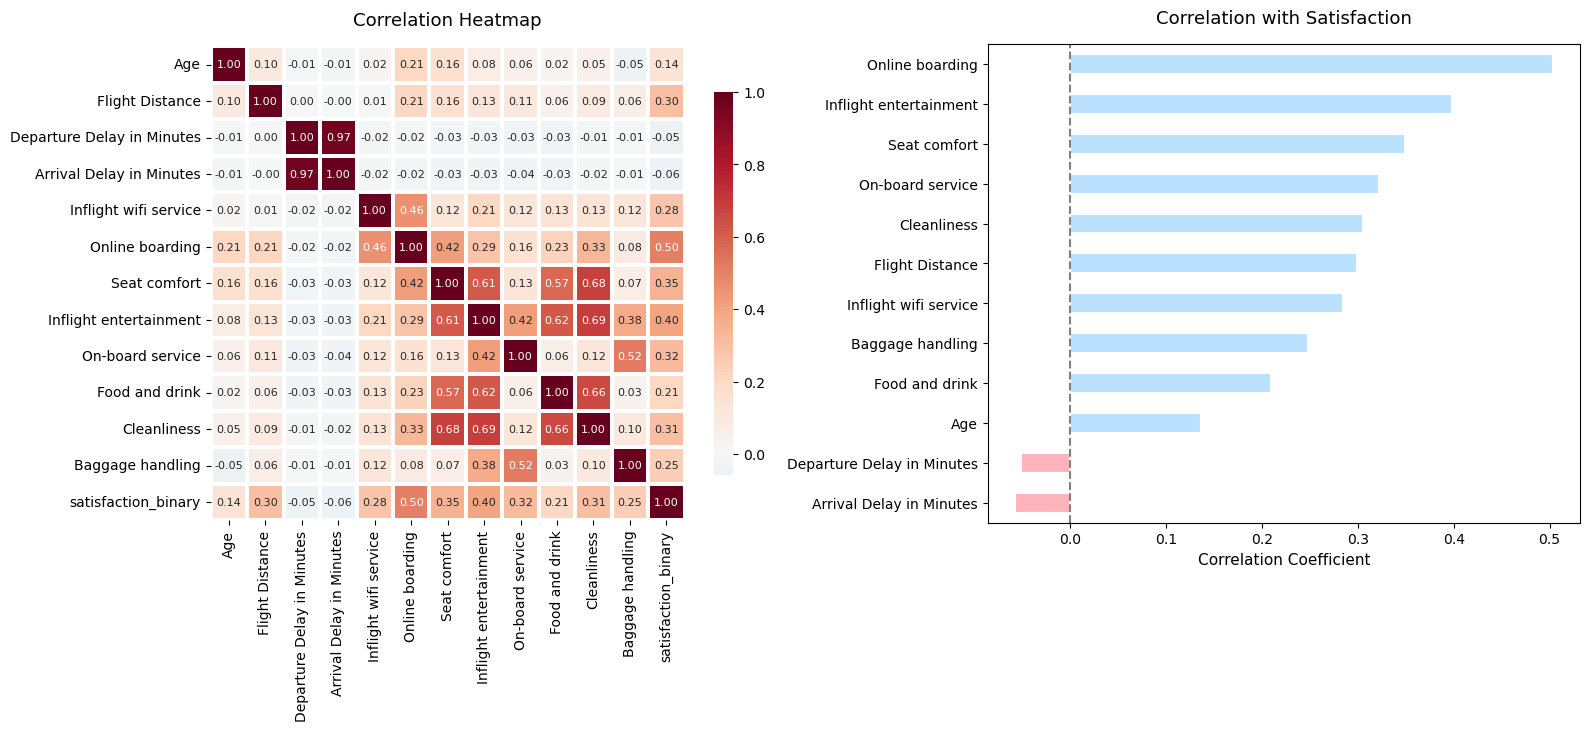

In [14]:
#Correlation Analysis
print('\n13. CORRELATION ANALYSIS:')

Train_df['satisfaction_binary'] = (Train_df['satisfaction'] == 'satisfied').astype(int)

corr_vars = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] + service_quality_vars + ['satisfaction_binary']

correlation_matrix = Train_df[corr_vars].corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', 
           center=0, square=True, linewidths=1.5, linecolor='white',
           cbar_kws={'shrink': 0.8}, ax=axes[0], annot_kws={'size': 8})
axes[0].set_title('Correlation Heatmap', fontsize=13, pad=15)

corr_with_target = correlation_matrix['satisfaction_binary'].drop('satisfaction_binary')
corr_with_target = corr_with_target.sort_values()

print("\nCorrelation with Satisfaction:")
print(corr_with_target.sort_values(ascending=False))

colors_corr = ['#bae1ff' if x > 0 else '#ffb3ba' for x in corr_with_target]
corr_with_target.plot(kind='barh', ax=axes[1], color=colors_corr, 
                     edgecolor='white', linewidth=1.5)
axes[1].set_title('Correlation with Satisfaction', fontsize=13, pad=15)
axes[1].set_xlabel('Correlation Coefficient', fontsize=11)
axes[1].axvline(x=0, color='gray', linestyle='--', linewidth=1.5)

plt.tight_layout()
plt.show()


14. KEY VARIABLES VS SATISFACTION (BOXPLOTS):


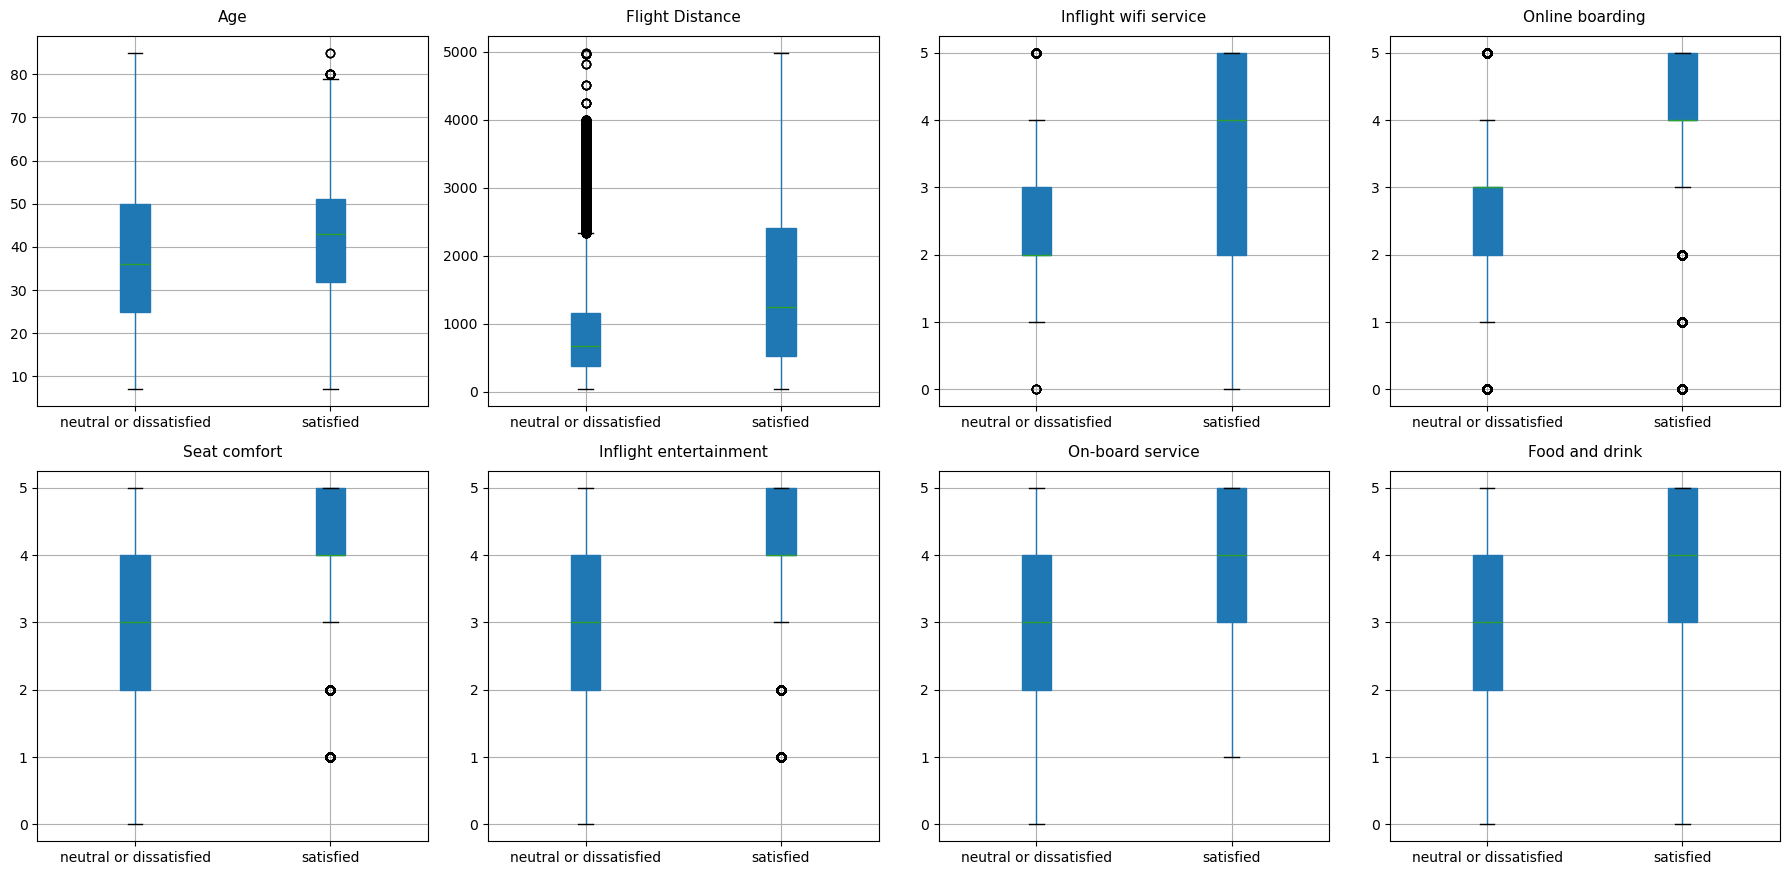

In [15]:
#Boxplots - Key Variables
print('\n14. KEY VARIABLES VS SATISFACTION (BOXPLOTS):')

fig, axes = plt.subplots(2, 4, figsize=(18, 9))
axes = axes.ravel()

key_vars = ['Age', 'Flight Distance'] + service_quality_vars[:6]

for i, col in enumerate(key_vars):
    Train_df.boxplot(column=col, by='satisfaction', ax=axes[i], patch_artist=True)
    axes[i].set_title(col, fontsize=11, pad=10)
    axes[i].set_xlabel('', fontsize=9)
    axes[i].get_figure().suptitle('')

plt.tight_layout()
plt.show()

In [17]:
#Summary
print('\n15. KEY STATISTICS SUMMARY:')
print(f"Total passengers: {Train_df.shape[0]:,}")
print(f"Total features: {Train_df.shape[1]}")
print(f"Missing values: {Train_df.isnull().sum().sum()}")
print(f"\nSatisfaction rate: {(Train_df['satisfaction'] == 'satisfied').mean() * 100:.2f}%")
print(f"Dissatisfaction rate: {(Train_df['satisfaction'] == 'neutral or dissatisfied').mean() * 100:.2f}%")

print("\n--- Top 5 Correlated Features ---")
for i, (feature, corr) in enumerate(corr_with_target.abs().sort_values(ascending=False).head(5).items(), 1):
    actual_corr = correlation_matrix.loc[feature, 'satisfaction_binary']
    print(f"{i}. {feature}: {actual_corr:.3f}")



15. KEY STATISTICS SUMMARY:
Total passengers: 103,904
Total features: 26
Missing values: 310

Satisfaction rate: 43.33%
Dissatisfaction rate: 56.67%

--- Top 5 Correlated Features ---
1. Online boarding: 0.504
2. Inflight entertainment: 0.398
3. Seat comfort: 0.349
4. On-board service: 0.322
5. Cleanliness: 0.305
